<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Simple_ANN_Classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from IPython import display
display.set_matplotlib_formats('svg')

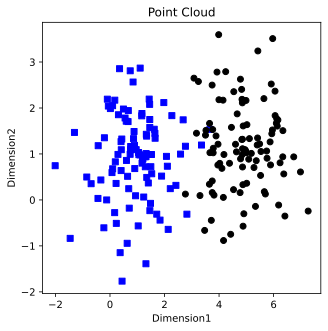

In [3]:
#Create Data
nPerClust=100
blur=1

#Center of the data cloud
A=[1,1]
B=[5,1]

#Data pont around center defined above..generate data
a=[A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur] #add random noise on center..with standard deviation is blur
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur]

#True Labels
labels_np=np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
#labels_np

#concatenate into a matrix
data_np=np.hstack((a,b)).T
#data_np

#convert to a pytorch tensor
data=torch.tensor(data_np).float()
#data

labels=torch.tensor(labels_np).float()
#labels

#Show the data
fig=plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('Point Cloud')
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.show()

In [4]:
#inspect Types
print(type(data_np))
print(np.shape(data_np))
print('  ')
print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
  
<class 'torch.Tensor'>
torch.Size([200, 2])


In [5]:
#Build the Model
ANNclass=nn.Sequential(
    nn.Linear(2,1),#Input layer
    nn.ReLU(),#Activation Unit
    nn.Linear(1,1),#output Layer
    nn.Sigmoid(),#Final Activation Unit
)

ANNclass

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [6]:
#Other Model Features
learningRate=.01

#LossFunction
lossfunc=nn.BCELoss() #Not a best practise rather dont use sigmoid and use loss func as BCELogit

#Optimizer
optimizer=torch.optim.SGD(ANNclass.parameters(),lr=learningRate)



In [7]:
#Train the Model
numepochs=1000
losses=torch.zeros(numepochs)

for epochi in range(numepochs):
  #forward pass
  yHat=ANNclass(data)

  #compute Loss
  loss=lossfunc(yHat,labels)
  losses[epochi]=loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  


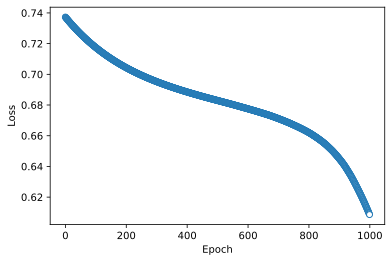

In [8]:
#Show the Loss

plt.plot(losses.detach(),'o',markerfacecolor='w',lw=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [9]:
#Compute Predictions


#Manually compute Losses

#final Forward pass
pred=ANNclass(data)

#pred
predlabels=pred>.5
#predlabels

# #find errors
misclass=np.where(predlabels!=labels)[0]

# #total Accuracy

totacc=100-100*len(misclass)/(2*nPerClust)

print('Final accuracy:', totacc)


Final accuracy: 92.0


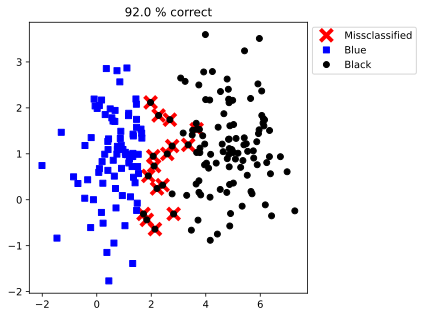

In [10]:
fig=plt.figure(figsize=(5,5))
plt.plot(data[misclass,0],data[misclass,1],'rx',markersize=12,markeredgewidth=4)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['Missclassified','Blue','Black'],bbox_to_anchor=(1,1))
plt.title(f'{totacc} % correct')
plt.show()

#Parametric Approach

Text(0, 0.5, 'Dimension2')

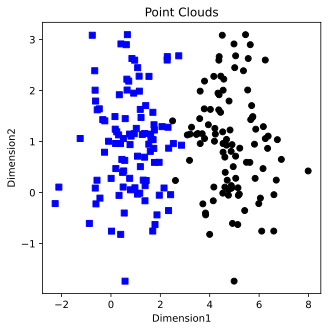

In [11]:
#Create Data
nPerclust=100
blur=1

A=[1,1]
B=[5,1]

#generate data
a=[A[0]+np.random.randn(nPerclust)*blur,A[1]+np.random.randn(nPerclust)*blur]
b=[B[0]+np.random.randn(nPerclust)*blur,B[1]+np.random.randn(nPerclust)*blur]

#True labels
labels_np=np.vstack((np.zeros((nPerclust,1)),np.ones((nPerclust,1))))
#labels_np

data_np=np.hstack((a,b)).T
#data_np

labels=torch.tensor(labels_np).float()
#labels
data=torch.tensor(data_np).float()
#data

#Show the plot
fig=plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==0)[0],1],'ko')
plt.title('Point Clouds')
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')


In [12]:
#Build ANN Classification model 
def createModel(learningRate):

  #Model Architecture
  ANNclass=nn.Sequential(
      nn.Linear(2,1),#Input Layer--input 2 output=1
      nn.ReLU(), #Activation Layer
      nn.Linear(1,1),
      #We will nor add sigmoid ..Later in loss function we will use BCElogit functiom..This is the best practices
  )

  #Loss function
  lossfunc=nn.BCEWithLogitsLoss()

  #Optimizer
  optimizer=torch.optim.SGD(ANNclass.parameters(),lr=learningRate)

  #Model Output
  return ANNclass,lossfunc,optimizer





In [13]:
#Train the Model
def trainModel(ANNModel):

  #Initialize Losses
  losses=torch.zeros(numepochs)

  #Loop Over Epochs
  for epochi in range(numepochs):

    #forward pass
    yHat=ANNModel(data)

    #Compute loss
    loss=lossfunc(yHat,labels)
    losses[epochi]=loss


    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



#Final Forward pass
  pred=ANNModel(data)

##Accuracy
  totacc=100*torch.mean(((pred>0)==labels).float())  # Why not .5 but 0???

  return losses,pred,totacc

Final Accuracy:  tensor(97.)


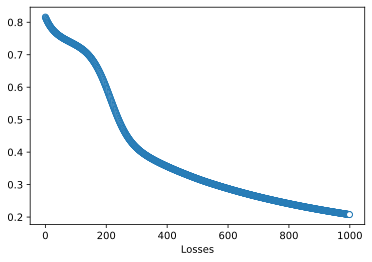

In [14]:
#Test  the new code by running it once
ANNclass,lossfunc,optimizer=createModel(.01)

#Run
losses,pred,totacc=trainModel(ANNclass)

#Report Accuracy
print('Final Accuracy: ',totacc)

#Show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',lw=.1)
plt.xlabel('Epoch')
plt.xlabel('Losses')
plt.show()

In [15]:
# Experiment
learningRate=np.linspace(.001,.1,40)

#Initialize results output
accByLR=[]
allLosses=np.zeros((len(learningRate),numepochs))


#Loop through Learningrates
for i,lr in enumerate(learningRate):

  #Create and run Model
  ANNclass,lossfunc,optimizer=createModel(lr)
  losses,pred,totacc=trainModel(ANNclass)

  #Store the results
  accByLR.append(totacc)
  allLosses[i,:]=losses.detach()



Text(0.5, 1.0, 'Losses by Learning Rate')

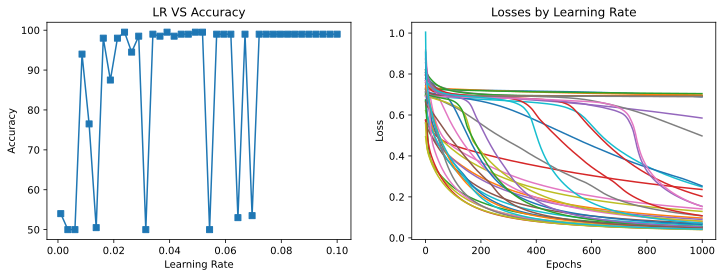

In [17]:
#Plot the Result
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(learningRate,accByLR,'s-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('LR VS Accuracy')

ax[1].plot(allLosses.T)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_title('Losses by Learning Rate')